In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
#YEAR 2001 to 2021
dataset = pd.read_csv('climate_change_dataset.csv')





In [3]:
# Check data types
print("\nClimate Change dataset info:")
dataset.info()


Climate Change dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      21 non-null     int64  
 1   Tree Cover Loss           21 non-null     float64
 2   Sea Level Rise            21 non-null     float64
 3   Greenhouse Gas Emissions  21 non-null     float64
 4   Temperature               21 non-null     float64
 5   Ice Extent                21 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


In [4]:
# Descriptive statistics for Arctic Sea Ice Extent dataset
print("\nDescriptive statistics for Arctic Sea Ice Extent dataset:")
print(dataset['Ice Extent'].describe())

# Descriptive statistics for Global Annual Mean Temperature dataset
print("\nDescriptive statistics for Global Annual Mean Temperature dataset:")
print(dataset['Temperature'].describe())

print("\nDescriptive statistics for Global Sea Level dataset:")
print(dataset['Sea Level Rise'].describe())

print("\nDescriptive statistics for Greenhouse Gases dataset:")
print(dataset['Greenhouse Gas Emissions'].describe())

print("\nDescriptive statistics for Tree Loss dataset:")
print(dataset['Tree Cover Loss'].describe())


Descriptive statistics for Arctic Sea Ice Extent dataset:
count    21.000000
mean      4.860619
std       0.786617
min       3.387000
25%       4.344000
50%       4.665000
75%       5.319000
max       6.603000
Name: Ice Extent, dtype: float64

Descriptive statistics for Global Annual Mean Temperature dataset:
count    21.000000
mean      0.731429
std       0.158249
min       0.530000
25%       0.630000
50%       0.670000
75%       0.850000
max       1.020000
Name: Temperature, dtype: float64

Descriptive statistics for Global Sea Level dataset:
count    21.000000
mean     36.346535
std      20.813325
min       2.152604
25%      14.619271
50%      36.718471
75%      53.857372
max      66.704325
Name: Sea Level Rise, dtype: float64

Descriptive statistics for Greenhouse Gases dataset:
count       21.000000
mean     44409.528095
std       4155.406480
min      36091.220000
25%      42265.060000
50%      45247.670000
75%      47463.170000
max      49843.570000
Name: Greenhouse Gas Emission

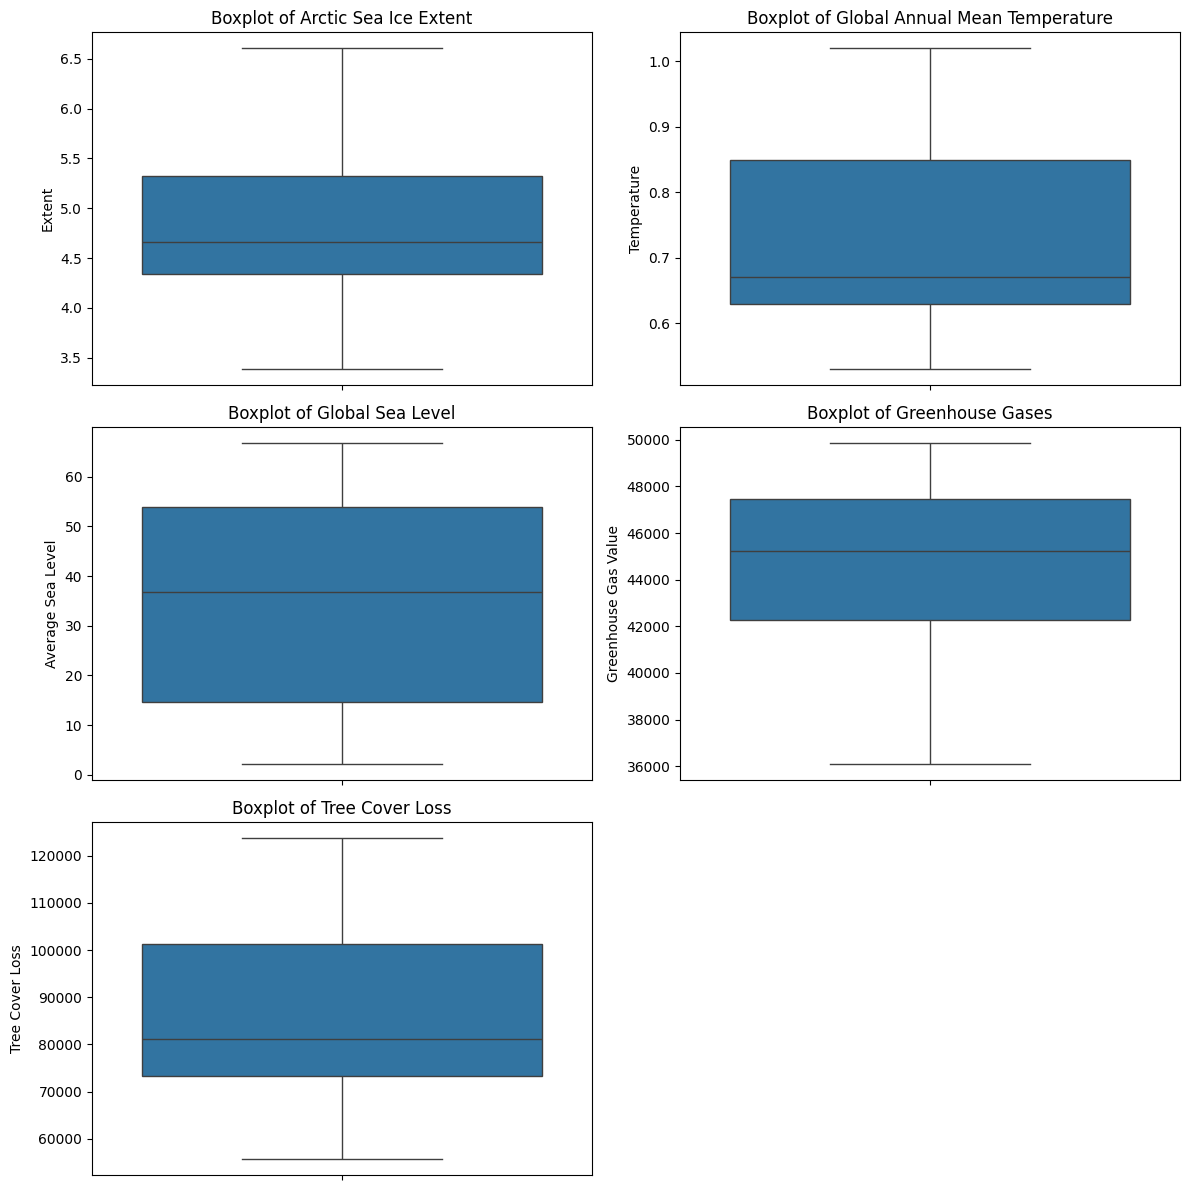

In [5]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for Arctic Sea Ice Extent
sns.boxplot(ax=axes[0], y=dataset['Ice Extent'])
axes[0].set_title('Boxplot of Arctic Sea Ice Extent')
axes[0].set_ylabel('Extent')

# Create a boxplot for Global Annual Mean Temperature
sns.boxplot(ax=axes[1], y=dataset['Temperature'])
axes[1].set_title('Boxplot of Global Annual Mean Temperature')
axes[1].set_ylabel('Temperature')

# Create a boxplot for Global Sea Level
sns.boxplot(ax=axes[2], y=dataset['Sea Level Rise'])
axes[2].set_title('Boxplot of Global Sea Level')
axes[2].set_ylabel('Average Sea Level')

# Create a boxplot for Greenhouse Gases
sns.boxplot(ax=axes[3], y=dataset['Greenhouse Gas Emissions'])
axes[3].set_title('Boxplot of Greenhouse Gases')
axes[3].set_ylabel('Greenhouse Gas Value')

# Create a boxplot for Tree Cover Loss
sns.boxplot(ax=axes[4], y=dataset['Tree Cover Loss'])
axes[4].set_title('Boxplot of Tree Cover Loss')
axes[4].set_ylabel('Tree Cover Loss')

# Remove the empty subplot (if any)
fig.delaxes(axes[5])  # Remove the 6th subplot if it's empty

# Adjust layout
plt.tight_layout()
plt.show()


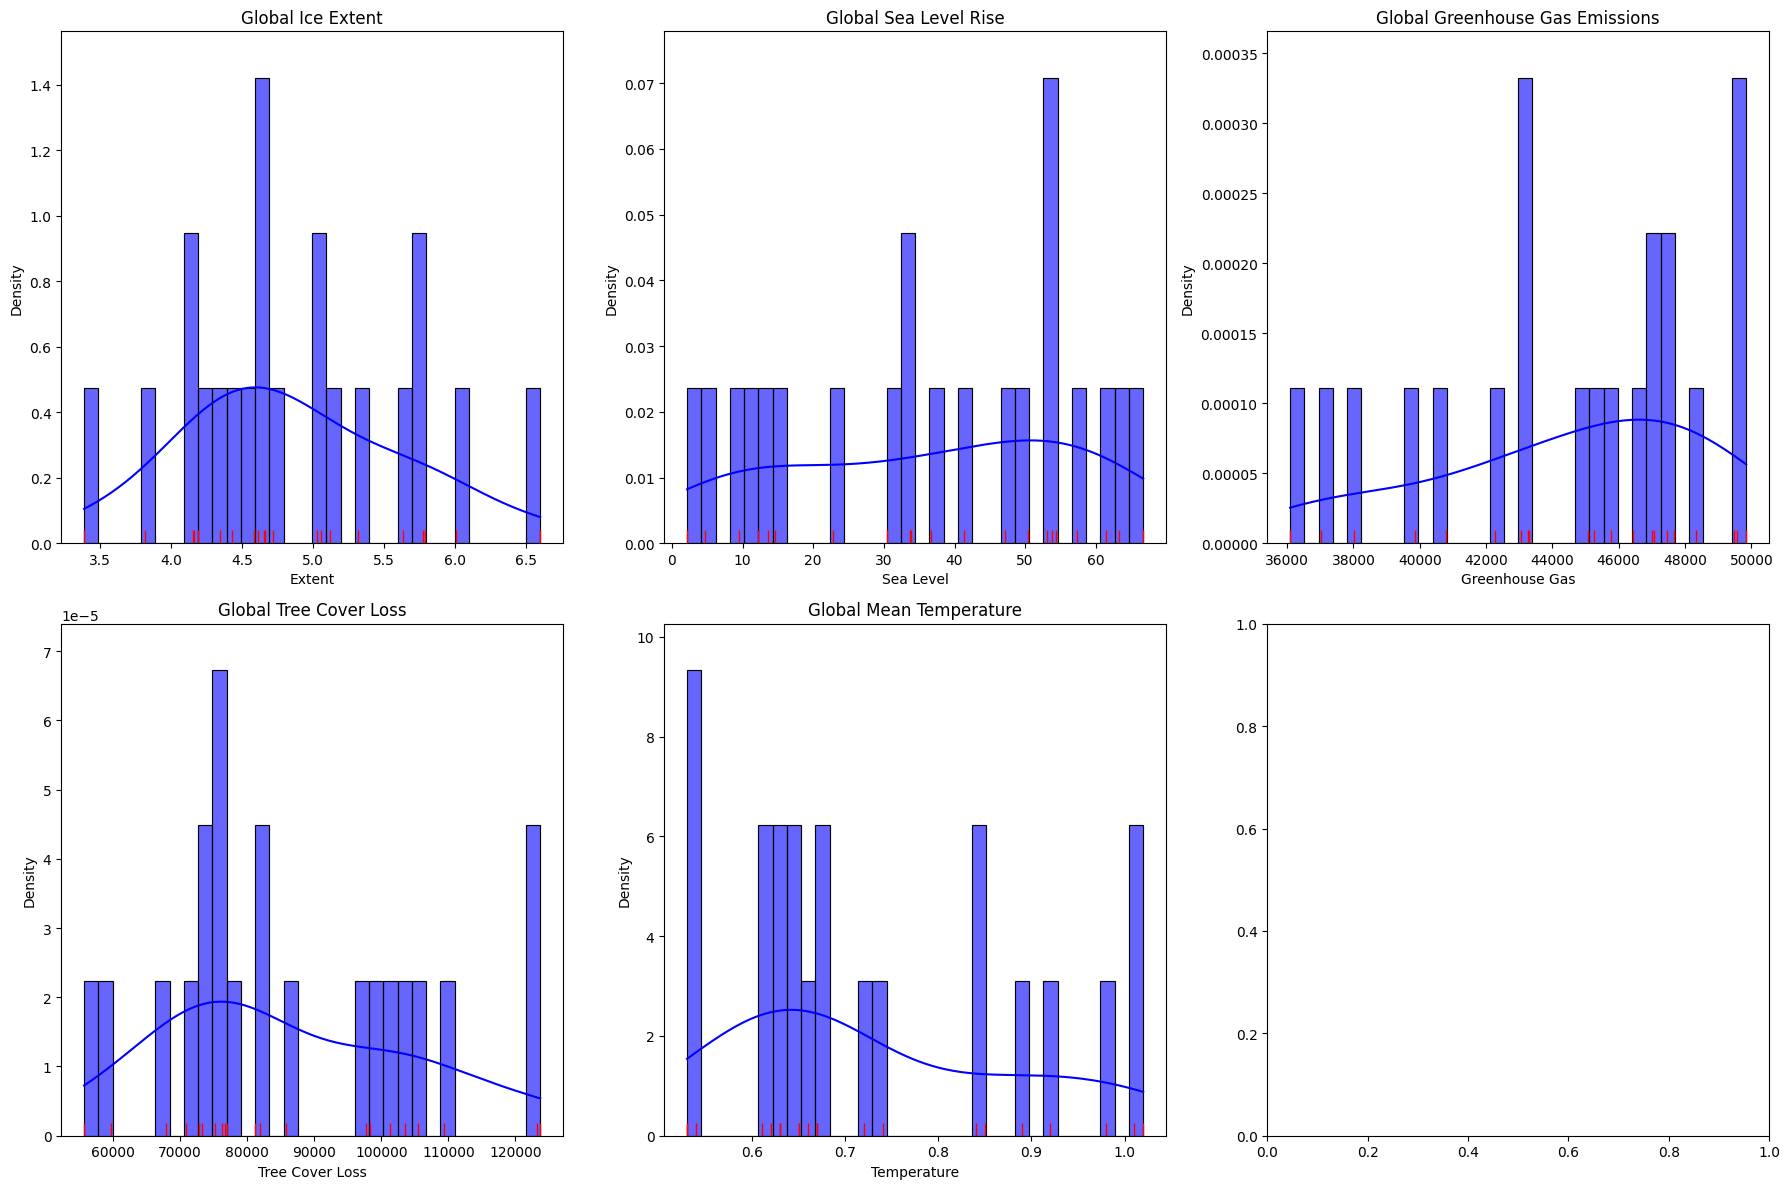

In [6]:
def histogram_density_rug(ax, dataframe, title, x_label, y_label):
    sns.histplot(dataframe, bins=32, kde=True, stat='density', color='blue', alpha=0.6, edgecolor='black', ax=ax)
    sns.rugplot(dataframe, color='red', lw=1, ax=ax)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Create a figure with subplots (2 rows and 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the array to make indexing easier

# Plot each dataset in a separate subplot
histogram_density_rug(axes[0], dataset['Ice Extent'], "Global Ice Extent", "Extent", "Density")
histogram_density_rug(axes[1], dataset['Sea Level Rise'], "Global Sea Level Rise", "Sea Level", "Density")
histogram_density_rug(axes[2], dataset['Greenhouse Gas Emissions'], "Global Greenhouse Gas Emissions", "Greenhouse Gas", "Density")
histogram_density_rug(axes[3], dataset['Tree Cover Loss'], "Global Tree Cover Loss", "Tree Cover Loss", "Density")
histogram_density_rug(axes[4], dataset['Temperature'], "Global Mean Temperature", "Temperature", "Density")

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Show the combined figure
plt.show()


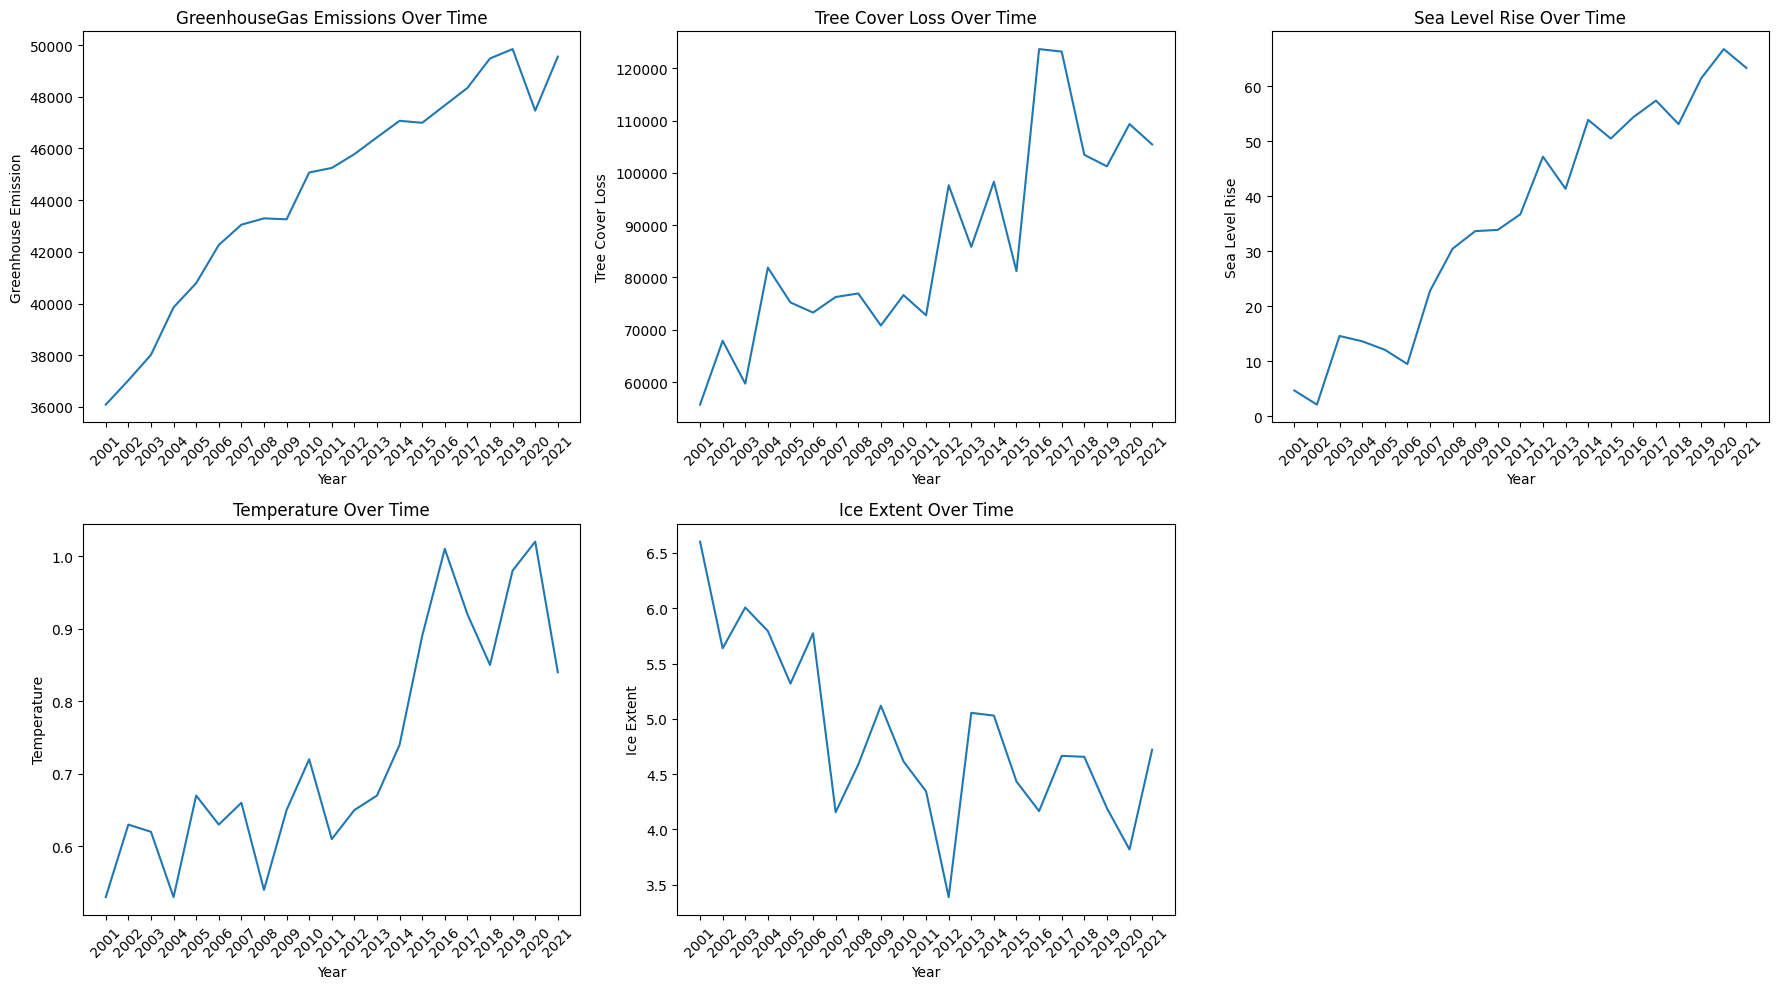

In [7]:
def timeseries(ax, dataframeX, dataframeY, title, x_label, y_label):
    sns.lineplot(x=dataframeX, y=dataframeY, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    ax.set_xticks(ticks=range(int(dataframeX.min()), int(dataframeX.max()) + 1, 1))
    ax.tick_params(axis='x', rotation=45)
  

fig, axes = plt.subplots(2,3, figsize=(18,10))
axes = axes.flatten()


timeseries(axes[0],dataset['Year'], dataset['Greenhouse Gas Emissions'], "GreenhouseGas Emissions Over Time", "Year", "Greenhouse Emission")
timeseries(axes[1],dataset['Year'], dataset['Tree Cover Loss'], "Tree Cover Loss Over Time", "Year", "Tree Cover Loss")
timeseries(axes[2],dataset['Year'], dataset['Sea Level Rise'], "Sea Level Rise Over Time", "Year", "Sea Level Rise")
timeseries(axes[3],dataset['Year'], dataset['Temperature'], "Temperature Over Time", "Year", "Temperature")
timeseries(axes[4],dataset['Year'], dataset['Ice Extent'], "Ice Extent Over Time", "Year", "Ice Extent")
    
# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

fig.delaxes(axes[5])

# Show the combined figure
plt.show()
        
    

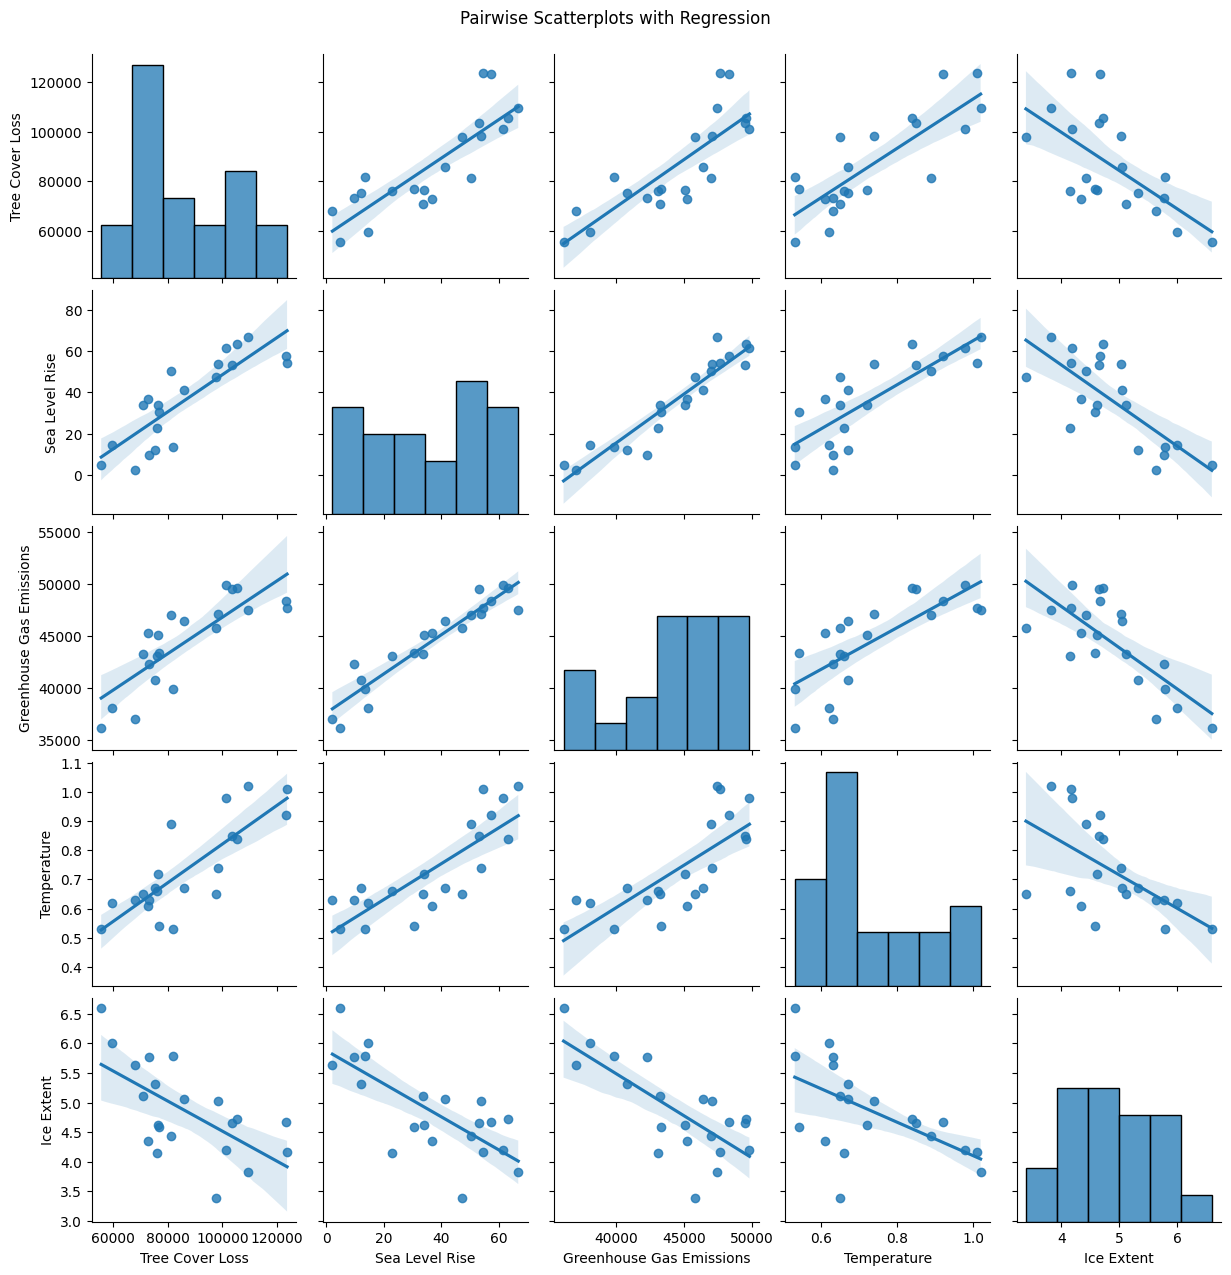

In [8]:
# Create pairwise scatterplot with regression
sns.pairplot(dataset.iloc[:, 1:], kind='reg', diag_kind='hist')

# Show the plot
plt.suptitle('Pairwise Scatterplots with Regression', y=1.02)  # Adjust title position
plt.show()

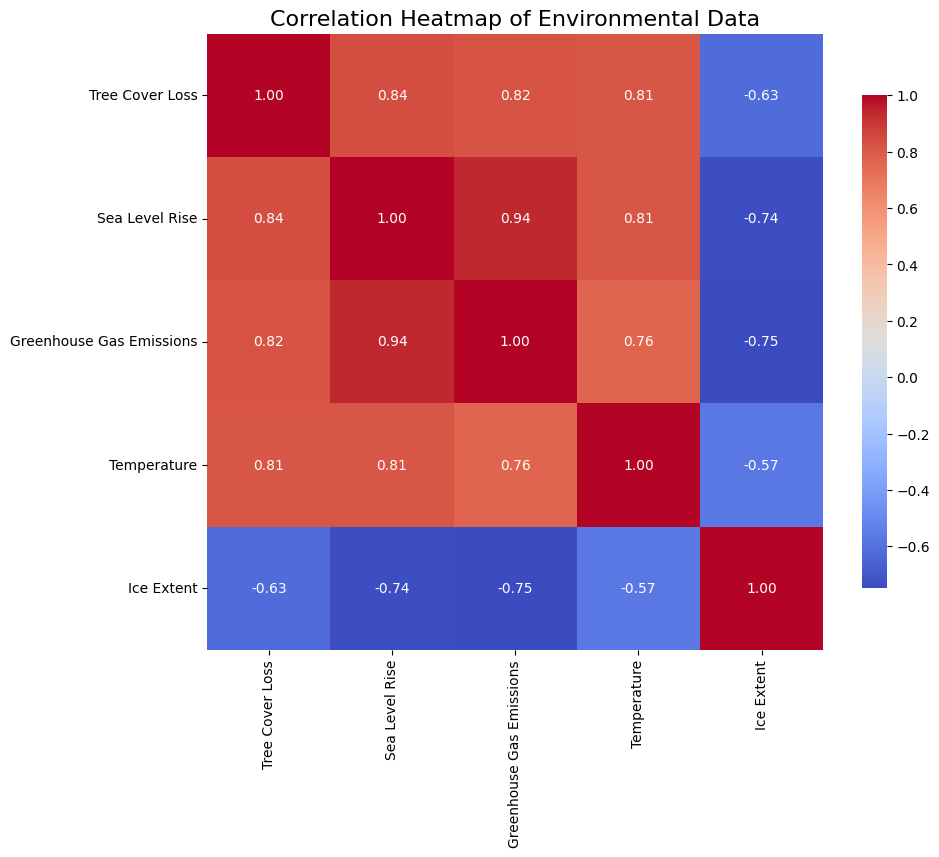

In [9]:
# Create a consolidated DataFrame with relevant columns

# Calculate the correlation matrix
correlation_matrix = dataset.iloc[:, 1:].corr()

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Heatmap of Environmental Data', fontsize=16)

# Show the plot
plt.show()